# Data Vizualisation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, cross_validate
from sklearn.multiclass import OneVsRestClassifier

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import collections
from itertools import cycle

In [5]:
fullDataset = pd.read_csv('./page-blocks.data', header=None, delimiter=r"\s+")
fullDataset.columns = ["height", "length", "area", "eccen","p_black", "p_and", "mean_tr", "blackpix", "blackand", "wb_trans","label"]
fullDataset.head(5)

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,label
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


#### Data exploration

In [ ]:
fullDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    5473 non-null   int64  
 1   length    5473 non-null   int64  
 2   area      5473 non-null   int64  
 3   eccen     5473 non-null   float64
 4   p_black   5473 non-null   float64
 5   p_and     5473 non-null   float64
 6   mean_tr   5473 non-null   float64
 7   blackpix  5473 non-null   int64  
 8   blackand  5473 non-null   int64  
 9   wb_trans  5473 non-null   int64  
 10  label     5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


In [ ]:
fullDataset.describe()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,label
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [ ]:
print("Null values per Column in Training Dataset:\n",fullDataset.isnull().sum(axis = 0))

Null values per Column in Training Dataset:
 height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
label       0
dtype: int64


#### Plotting distribution of features

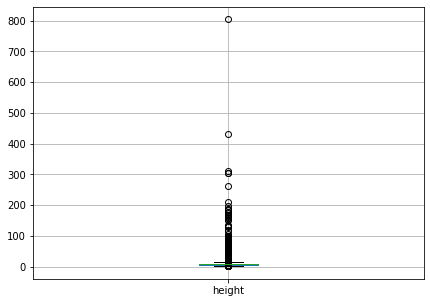

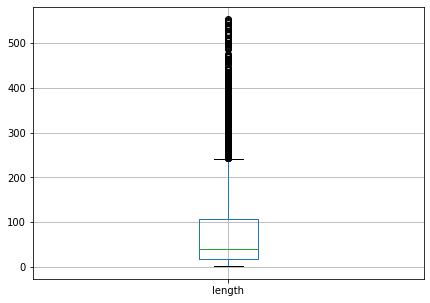

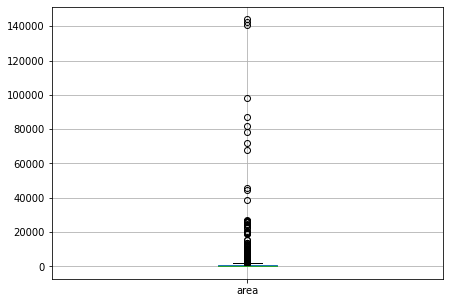

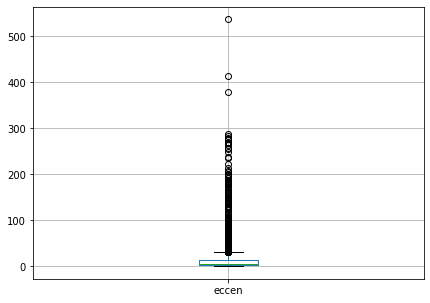

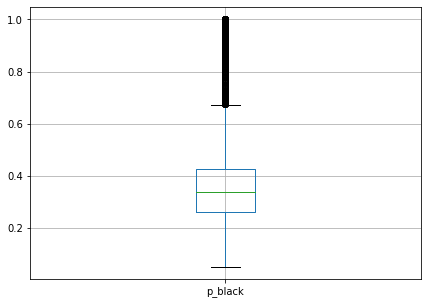

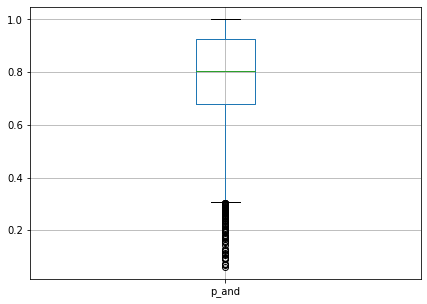

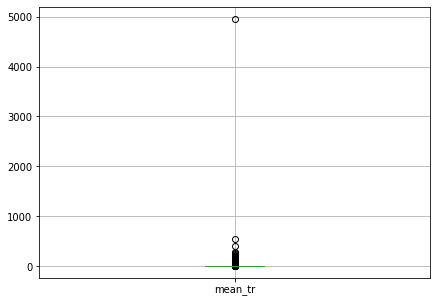

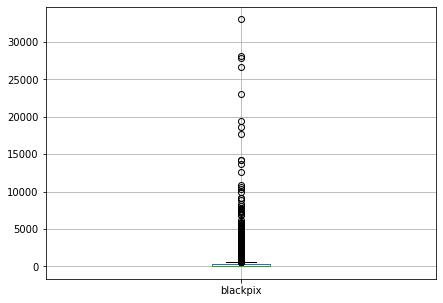

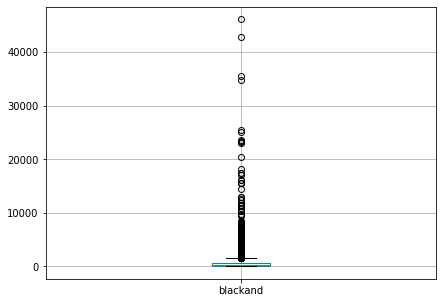

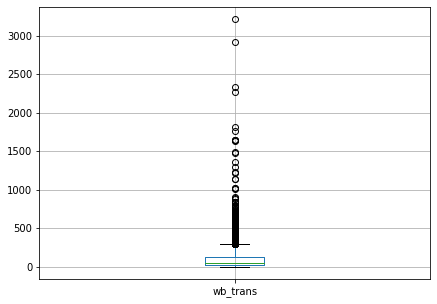

In [ ]:
box_df = fullDataset[["height", "length", "area",
                "eccen","p_black", "p_and", "mean_tr",
                "blackpix", "blackand", "wb_trans"]]

from pylab import rcParams

rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

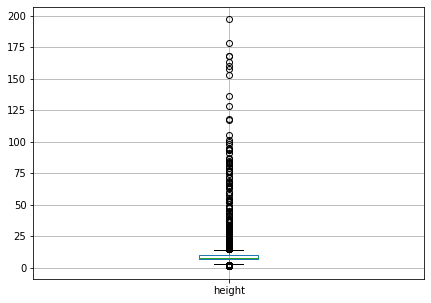

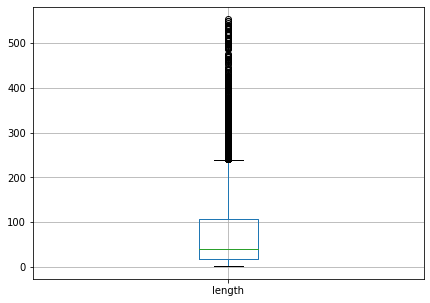

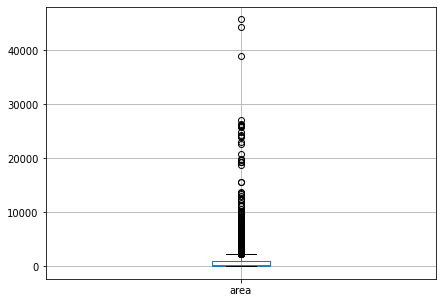

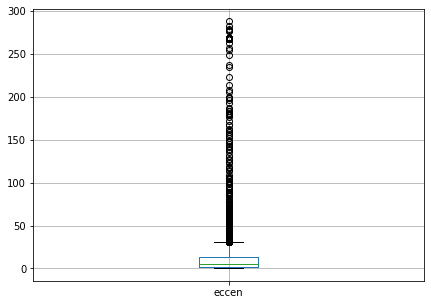

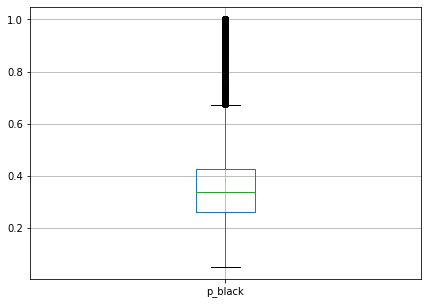

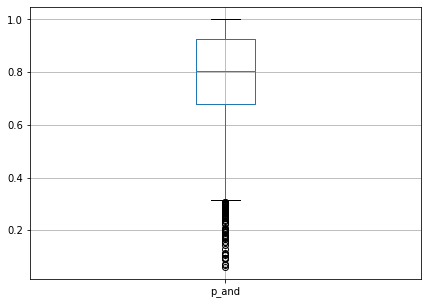

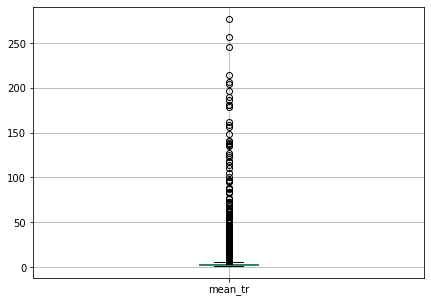

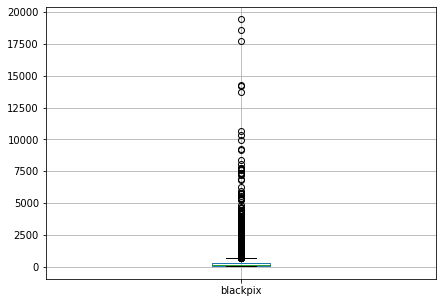

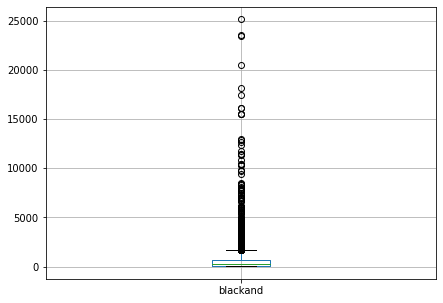

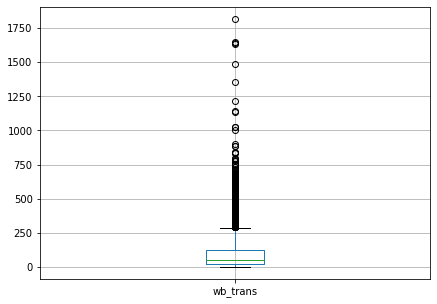

In [ ]:
datasetCleaned = fullDataset[(fullDataset.height < 200) &  
                             (fullDataset.area < 60000) & 
                             (fullDataset.eccen < 300) &
                             (fullDataset.mean_tr < 1000) &
                             (fullDataset.blackpix < 20000) &
                             (fullDataset.blackand < 30000) &
                             (fullDataset.wb_trans < 2000) ]

box_df = datasetCleaned[["height", "length", "area",
                "eccen","p_black", "p_and", "mean_tr",
                "blackpix", "blackand", "wb_trans"]]

from pylab import rcParams

rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

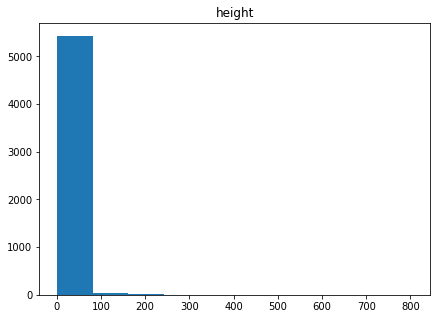

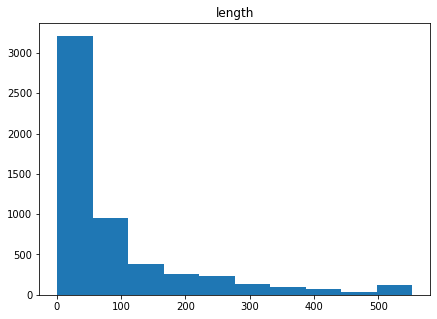

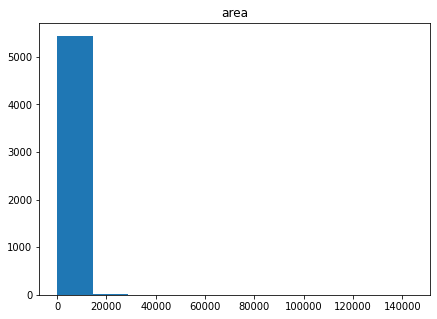

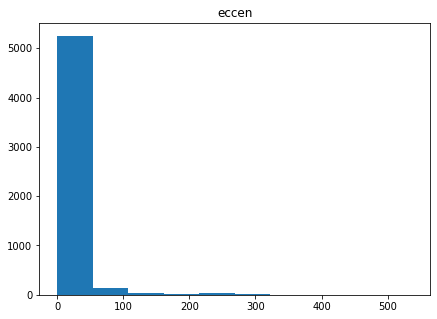

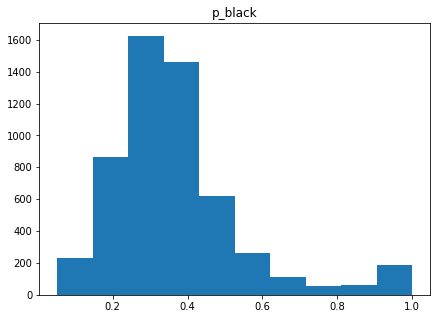

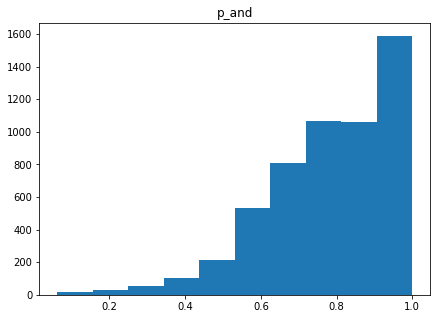

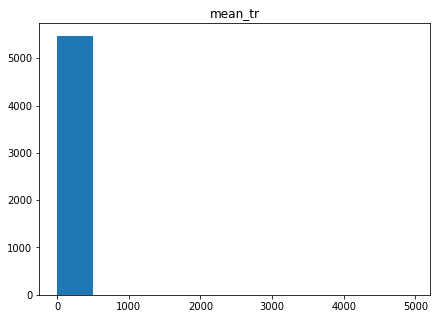

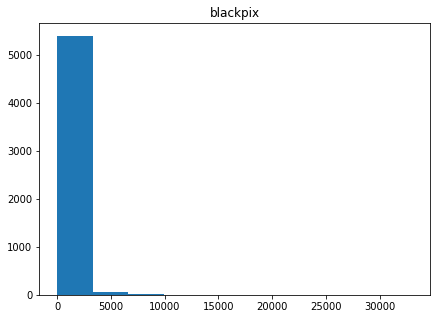

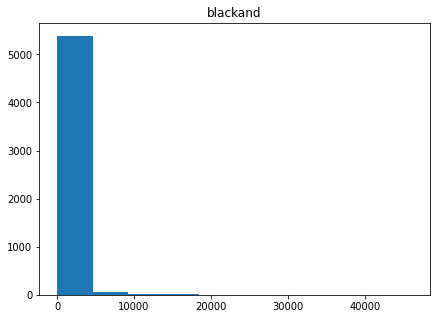

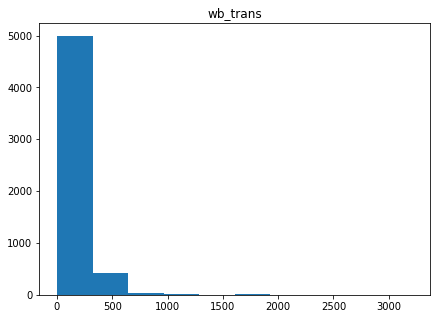

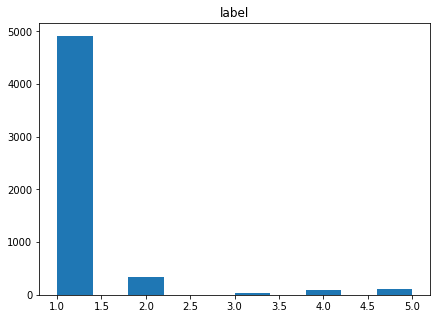

In [ ]:
#Histograms of every columns of full dataset

for i in fullDataset.columns:
    plt.figure()
    plt.hist(fullDataset[i])
    plt.title(i)

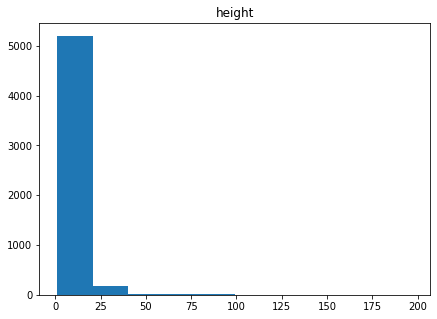

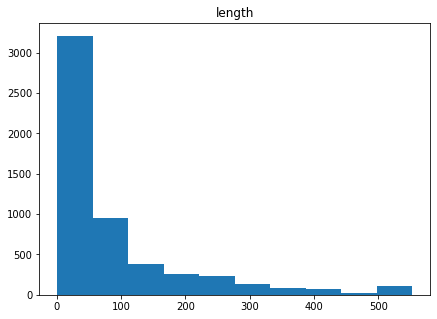

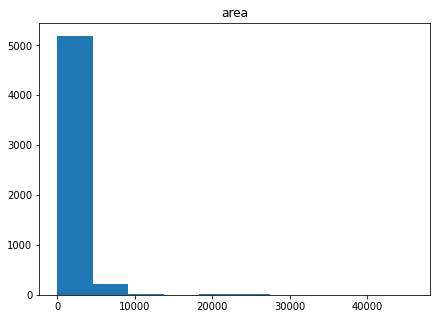

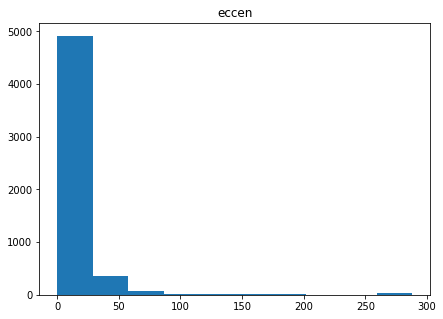

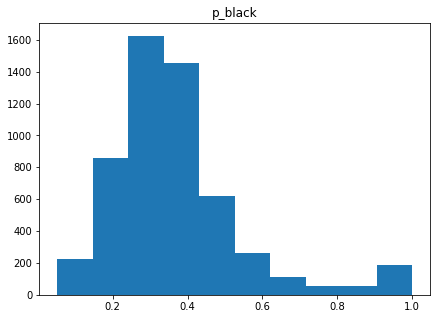

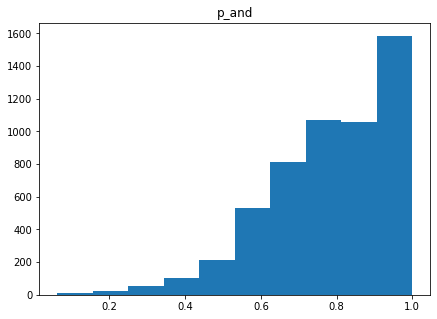

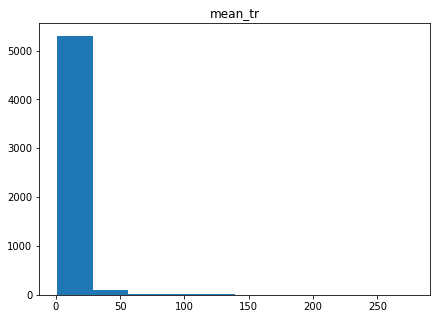

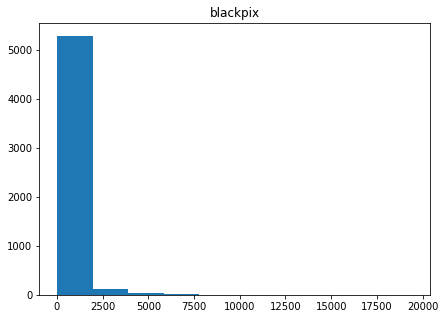

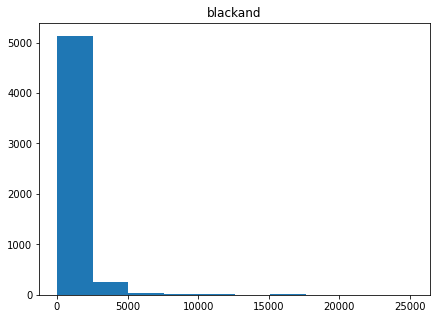

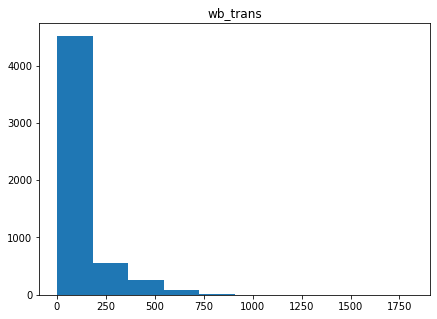

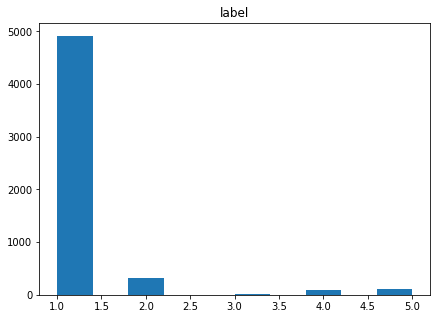

In [ ]:
#Histograms of every columns of cleaned dataset

for i in datasetCleaned.columns:
    plt.figure()
    plt.hist(datasetCleaned[i])
    plt.title(i)

#### Count of labels 

1    4913
2     329
5     115
4      88
3      28
Name: label, dtype: int64

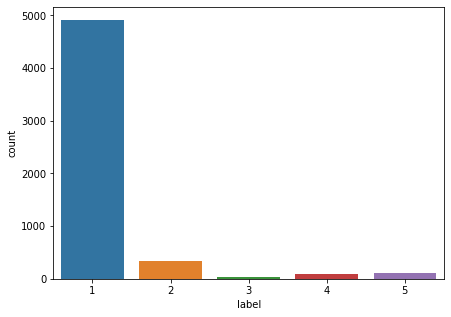

In [ ]:
#count of labels

sns.countplot(x="label", data=fullDataset)
fullDataset.loc[:,'label'].value_counts()

1    4913
2     325
5     110
4      85
3      22
Name: label, dtype: int64

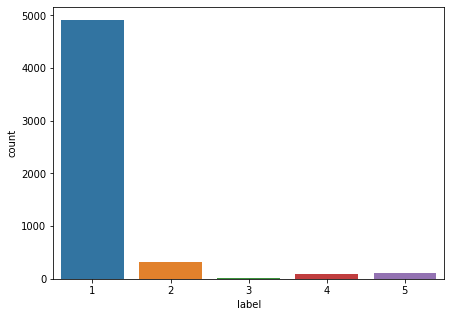

In [ ]:
#count of labels

sns.countplot(x="label", data=datasetCleaned)
datasetCleaned.loc[:,'label'].value_counts()

#### Plotting correlation between features

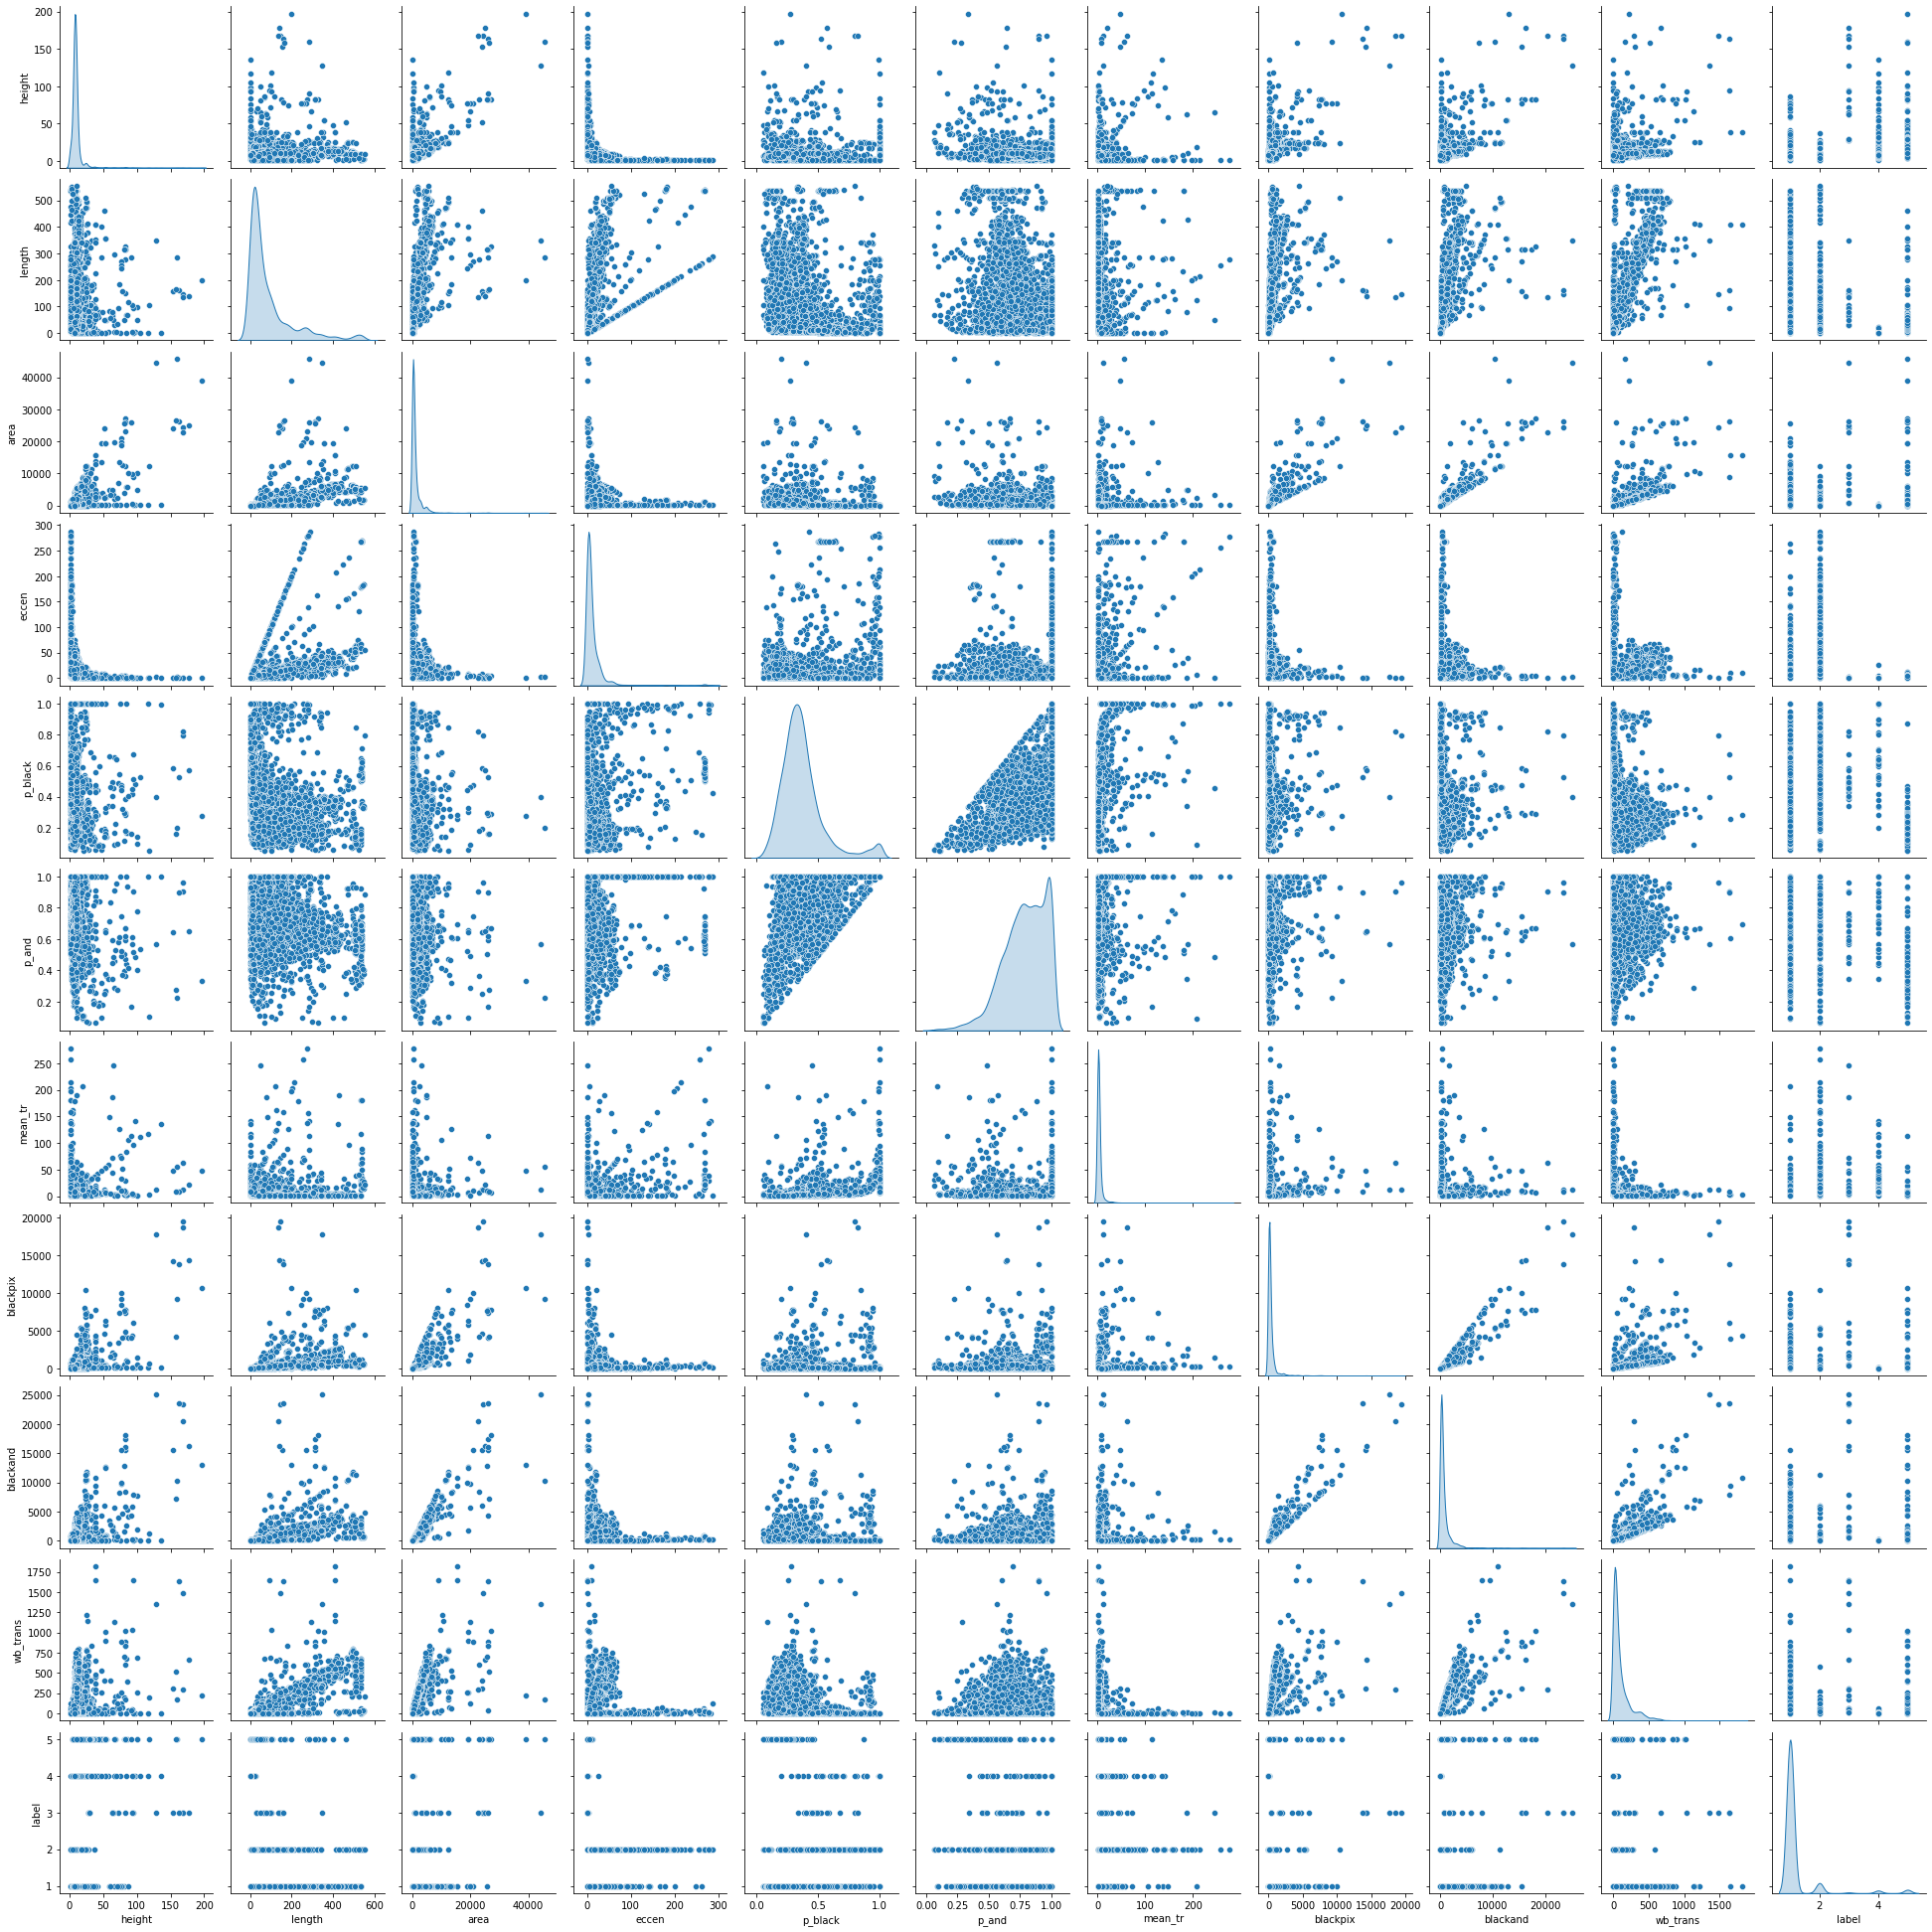

In [ ]:
sns.pairplot(datasetCleaned[["height", "length", "area",
                "eccen","p_black", "p_and", "mean_tr",
                "blackpix", "blackand", "wb_trans","label"]], diag_kind='kde')

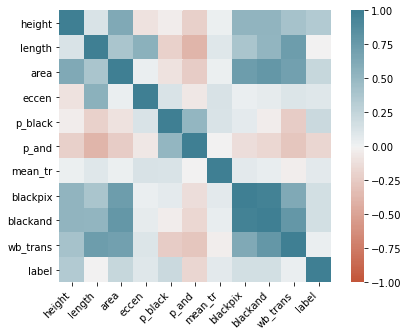

In [ ]:
#correlation matrix of full dataset

corr = fullDataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

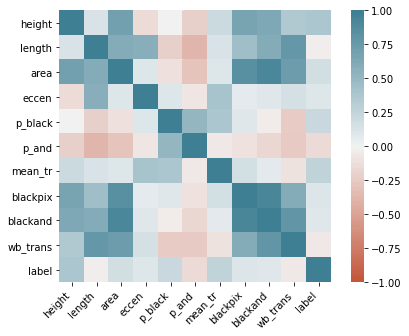

In [ ]:
#correlation matrix of cleaned dataset

corr = datasetCleaned.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Machine Learning

### Splitting full dataset into data and label datasets

In [ ]:
data = np.array(fullDataset.drop(['label'], 1))
label = np.array(fullDataset['label'])

### Logistic Regression

#### Plotting ROC curves for each class

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


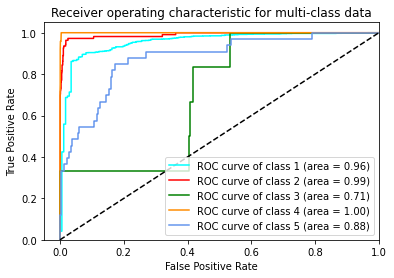

In [ ]:
# binarize label column into 5 columns
y = label_binarize(label, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]
x_train,x_test,y_train,y_test = train_test_split(data, y, test_size=0.3, random_state=87)


logreg = LogisticRegression()
classifier = OneVsRestClassifier(logreg)
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['aqua', 'red', 'green', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
    
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


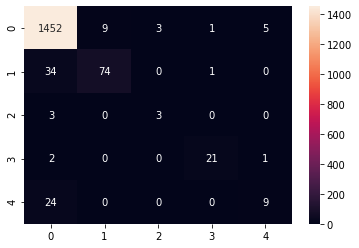

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
cr= classification_report(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [ ]:
print(cr)

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1470
           2       0.89      0.68      0.77       109
           3       0.50      0.50      0.50         6
           4       0.91      0.88      0.89        24
           5       0.60      0.27      0.37        33

    accuracy                           0.95      1642
   macro avg       0.77      0.66      0.70      1642
weighted avg       0.94      0.95      0.94      1642



#### Model with scaled data

In [ ]:
# same model with scaled data

x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

scaler = MinMaxScaler(feature_range = (0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

logreg = LogisticRegression()
logreg.fit(x_train_scaled,y_train)
y_pred = logreg.predict(x_test_scaled)

cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.94      0.99      0.97      1470
           2       0.95      0.38      0.54       109
           3       0.67      0.33      0.44         6
           4       0.86      0.75      0.80        24
           5       0.60      0.27      0.37        33

    accuracy                           0.93      1642
   macro avg       0.80      0.55      0.62      1642
weighted avg       0.93      0.93      0.92      1642



#### Grid Search and Cross Validation

In [ ]:
# Grid search and cross validation 

x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

grid={"C":np.logspace(-4,4,20), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

tuned hpyerparameters :(best parameters)  {'C': 0.23357214690901212, 'penalty': 'l2'}
accuracy : 0.9548398063533506


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1470
           2       0.88      0.62      0.73       109
           3       0.50      0.50      0.50         6
           4       0.91      0.88      0.89        24
           5       0.67      0.30      0.42        33

    accuracy                           0.95      1642
   macro avg       0.78      0.66      0.70      1642
weighted avg       0.94      0.95      0.94      1642



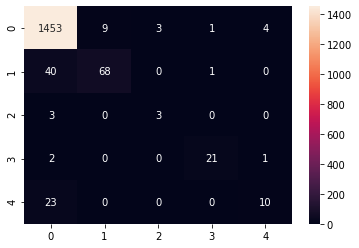

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

logreg=LogisticRegression(C=0.23357214690901212, penalty='l2')
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
cr= classification_report(y_test, y_pred)
print(cr)

sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### Support Vector Machine 

#### Grid Search and Cross Validation

In [ ]:
#cross validation and grid search for SVM classifier

x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

classifier=SVC()

param_grid = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 1e-3, 1e-4],
                     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]  

CV_svm = GridSearchCV(classifier, param_grid,refit=True,verbose=2)
CV_svm.fit(x_train, y_train)

print("tuned hyperparameters(best parameters) : ",CV_svm.best_params_)
print("accuracy :",CV_svm.best_score_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:  2.9min finished


tuned hyperparameters(best parameters) :  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
accuracy : 0.9532749411936914


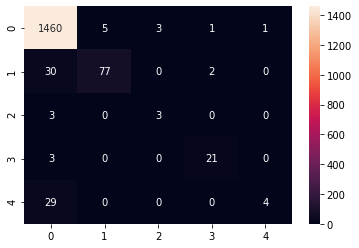

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1470
           2       0.94      0.71      0.81       109
           3       0.50      0.50      0.50         6
           4       0.88      0.88      0.88        24
           5       0.80      0.12      0.21        33

    accuracy                           0.95      1642
   macro avg       0.81      0.64      0.67      1642
weighted avg       0.95      0.95      0.95      1642



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

classifier=SVC(C=10, gamma=0.0001, kernel='rbf')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

print(classification_report(y_test, y_pred))

### Decision Tree

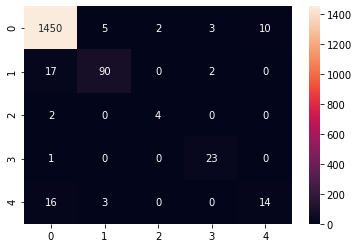

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1470
           2       0.92      0.83      0.87       109
           3       0.67      0.67      0.67         6
           4       0.82      0.96      0.88        24
           5       0.58      0.42      0.49        33

    accuracy                           0.96      1642
   macro avg       0.79      0.77      0.78      1642
weighted avg       0.96      0.96      0.96      1642



#### Grid Search and Cross Validation

In [ ]:
# cross validation and grid search for decision tree classifier

x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

classifier = DecisionTreeClassifier()
tree_para = {'criterion':['gini','entropy'],'max_depth':range(2,20)}
tree_cv = GridSearchCV(classifier, tree_para, cv=5)
tree_cv.fit(x_train, y_train)

print("tuned hyperparameters(best parameters) : ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters(best parameters) :  {'criterion': 'entropy', 'max_depth': 6}
accuracy : 0.970765350063487
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1470
           2       0.93      0.84      0.88       109
           3       0.67      0.67      0.67         6
           4       0.85      0.92      0.88        24
           5       0.62      0.45      0.53        33

    accuracy                           0.97      1642
   macro avg       0.81      0.77      0.79      1642
weighted avg       0.96      0.97      0.96      1642



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

classifier = DecisionTreeClassifier(criterion='entropy',max_depth=6)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1470
           2       0.92      0.88      0.90       109
           3       0.67      0.67      0.67         6
           4       0.81      0.92      0.86        24
           5       0.62      0.45      0.53        33

    accuracy                           0.97      1642
   macro avg       0.80      0.78      0.79      1642
weighted avg       0.97      0.97      0.97      1642



### Random Forest 

#### Grid Search and Cross Validation

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

classifier=RandomForestClassifier(random_state=87)

param_grid = { 
    'n_estimators': [400, 500], #[320,330,340]
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(10,20),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

print("tuned hyperparameters(best parameters) : ",CV_rfc.best_params_)
print("accuracy :",CV_rfc.best_score_)

tuned hyperparameters(best parameters) :  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 500}
accuracy : 0.9772900419048136


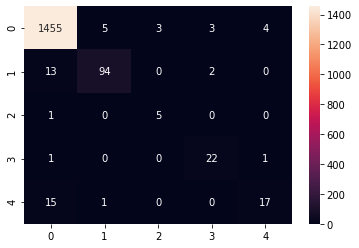

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1470
           2       0.94      0.86      0.90       109
           3       0.62      0.83      0.71         6
           4       0.81      0.92      0.86        24
           5       0.77      0.52      0.62        33

    accuracy                           0.97      1642
   macro avg       0.83      0.82      0.82      1642
weighted avg       0.97      0.97      0.97      1642



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.3, random_state=87)

classifier=RandomForestClassifier(criterion= 'entropy', max_depth=14, max_features='auto', n_estimators=500)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

print(classification_report(y_test, y_pred))

import pickle
with open('page_block_classifier.pkl', 'wb') as file:
  pickle.dump(classifier, file)